## 第6章 模組與變數 (Modules and Variables)

### 6.1 介紹模組（Module）

為了可以呼叫别人寫好的程式，Python 設計模組的觀念，定義所有副檔名為 (.py) 的檔案都是可以被搜索的模組並可以被載入到我們的程式裡來呼叫。

Python 模組的架構讓人們可以方便疊床架屋，使得程式可以像蓋房子砌牆一樣從簡單的一磚一瓦一楝樑地建起一棟高樓，理論上可以完成一套複雜系統。

首先我們來學習如何載入模組。

### 介绍「進口」指令：import statement

#### 語法

	import <模組名稱> 
	from <模組名稱> import <變數名稱> 

其中：
1. Python 的模組（Module）基本上就是一個檔案，副檔名是 “.py”。它可以是內建的、自訂的，或是他人寫好的
2. Python 系統啓動時，會從環境變數 PYTHONPATH 定義的目錄列載入成一個可搜索的目錄列表
3. 一旦進口指令（或稱引進指令）需要模組載入時，Python 會搜索檔案，名字叫 “<模組名稱>.py”
4. 若是在目錄列中，檔案找不到，Python 列印出錯誤信息並停止執行
5. 若 Python 搜索模組一旦成功，Python 會將該模組載入。我們後面的程式就可以呼叫模組裡面的所有的屬性和方法
6. 第二種進口指令是從進口模組當中載入，叫<變數名稱>的 一部份模組。它可以是屬性、方法或類別。類別下一章再詳細討論，下面先說明屬性和方法的呼叫語法。

#### 呼叫語法

	<模組名稱>.<模組內的屬性>
	<模組名稱>.<模組內的方法>(參數列)

其中：
1. <模組內的屬性>就是進口模塊內定義和使用的變數
2. <模組內的方法>就是進口模塊內定義的函式
		
同學們很早就看到進口指令了，記得嗎？
	
- 在說明多行字串在使用手冊上 Python 利用 help() 發揮出來很大功用(提示：import greetings)
	
現在終於對進口指令能夠整合模塊的強大功能有了深刻印象了吧，看看一些例子如下：


In [1]:
# 輸入系統模組 'sys'
import sys

# 系统模組中有變數名稱, version, 提供 Python 版本資訊
print(f'Python sys.version:\n{sys.version}\n')

# 系统模組中有變數名稱, executable, 提供 Python 執行程式所在的資料夾位置 
print(f'Python sys.executable:\n{sys.executable}\n')


Python sys.version:
3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]

Python sys.executable:
/Users/michaelkao/opt/anaconda3/bin/python



#### 問：Python 搜索模組規則好像很複雜！可以檢視 Python 搜索的目錄列嗎？
答：可以。

Python 提供系統模组中，把搜索目錄列存到 sys.path 列表物件 (list) 裡。

#### 檢視搜索目錄列，例子如下：


In [57]:
import sys

print(f'sys.path 物件類型: {type(sys.path)}\n')

print('Python 搜索的目錄列:')
print(sys.path)

sys.path 物件類型: <class 'list'>

Python 搜索的目錄列:
['/Users/michaelkao/Library/CloudStorage/OneDrive-Personal/My Projects/小朋友玩大蟒蛇', '/Users/michaelkao/opt/anaconda3/lib/python39.zip', '/Users/michaelkao/opt/anaconda3/lib/python3.9', '/Users/michaelkao/opt/anaconda3/lib/python3.9/lib-dynload', '', '/Users/michaelkao/opt/anaconda3/lib/python3.9/site-packages', '/Users/michaelkao/opt/anaconda3/lib/python3.9/site-packages/aeosa', '/Users/michaelkao/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg', '/Users/michaelkao/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions', '/Users/michaelkao/.ipython']


### 6.2 變數的有效範圍

#### 複習變數命名規則：

前面學習過的指派指令中，知道變數命名規則，現在複習一下：

1. 變數（variable）的名稱可以是任何大小寫的英文字母或下底線（_）或者數字的組成。
2. 變數名稱開頭不可以是數字。

除名稱外，變數在程式中也有範圍限制。

Python 程式中，當一個變數名稱第一次出現時，我們可以想像成 Python 必須有一張變數名稱表上登記該變數及其相關物件資料，包括記憶體儲存地址等。這一張變數名稱表 Python 叫它為 Variable Scope （變數範圍）。而且一個模組或函式都至少有一張變數範圍表管理我們的變數。
	
若在不同的模組或函式中有同名的變數被重覆定義時，Python 就得依底下四種變數範圉規則來認定變數的有效範圍。這四種範圊規則依序如下：

1. 局域變數 (Local variable) 範圍：局域變數只存在某一段程式區域中有效。例如上面學習過的定義函式指令中，參數列中的變數都是局域變數。
2. 外圍變數 (Enclosing variable) 範圍：外圍變數定義在外面縮格層的程式區塊中而內層程式區塊仍能有效訪問。内層變數必須用 'nonlocal' 來宣告。
3. 全域變數 (Global variable) 範圍：全域變數相對於上面的局域變數在整個程式中都有效。變數必須用 'global' 來宣告。
4. 內建變數 (Built-in variable) 範圍：Python 系統內建在 builtin 模組內的變數。

當一個變數須要被訪問時，Python 依上面 LEGB 規則順序搜索變數的定義。若還找不到變數的定義範圍的話，Python 列印出錯誤信息並停止執行。

#### 問：可以檢查變數是屬那一種範圍嗎？
答：可以。 

Python 提供兩個函式：locals () 和 globals ()

1.  'locals()'：返回一個局域字典供查詢變數是否在局域範圍
2.  'global()'：返回一個全域字典供查詢變數是否在全域範圍
	 
#### 局域和全域變數範圍的例子如下：


In [58]:
# 局域和全域變數範圍的例子
def test():
    
    # 宣告全域變數 y
    print('\t 宣告全域變數 y')
    global y
    
    # 指派局域變數 x
    x = 'test()指派的局域變數 x'
    print(f'\t x = \'{x}\'')

    y = 'test()指派的全域變數 y'
    print(f'\t y = \'{y}\'')

    # 檢查變數有效範圍
    if 'x' in locals():
        print('\t test()中的 x 是局域變數')

    if 'y' in globals():
        print('\t test()中的 y 是全域變數\n')


print('主程式開始...') 

# 指派全域變數 x
x = '主程式指派的全域變數 x'
print(f'x = \'{x}\'\n')

print(f'呼叫 test()中...')
test()

print('返回主程式...')
print(f'y = \'{y}\'')
      
if 'y' in globals():
    print(f'主程式中的 y 是全域變數\n')


主程式開始...
x = '主程式指派的全域變數 x'

呼叫 test()中...
	 宣告全域變數 y
	 x = 'test()指派的局域變數 x'
	 y = 'test()指派的全域變數 y'
	 test()中的 x 是局域變數
	 test()中的 y 是全域變數

返回主程式...
y = 'test()指派的全域變數 y'
主程式中的 y 是全域變數



#### 外圍變數範圍的例子如下：


In [59]:
# 外圍變數範圍的例子

# 外層函式
def outer():
    print('\t 在 outer() 外圍範圍...')
    x = '指派外圍變數 x'
    y = '指派外圍變數 y'

    print(f'\t x = \'{x}\'')
    print(f'\t y = \'{y}\'\n')

    # 內層函式
    def inner():
        print('\t\t 在 inner() 局域範圍...')
        
        x = 'inner() 指派局域變數 x'
        print(f'\t\t x = \'{x}\'')

        # 宣告外圍變數 y
        print('\t\t 宣告外圍變數 y')
        nonlocal y
        y = 'inner() 指派外圍變數 y'
        print(f'\t\t y = \'{y}\'\n')

    print('\t 呼叫 inner()...')
    inner()
    print('\t 返回 outer() 外圍範圍...')
    print(f'\t x = \'{x}\'')
    print(f'\t y = \'{y}\'')

# 主程式
print('在主程式模組範圍...')
outer()

在主程式模組範圍...
	 在 outer() 外圍範圍...
	 x = '指派外圍變數 x'
	 y = '指派外圍變數 y'

	 呼叫 inner()...
		 在 inner() 局域範圍...
		 x = 'inner() 指派局域變數 x'
		 宣告外圍變數 y
		 y = 'inner() 指派外圍變數 y'

	 返回 outer() 外圍範圍...
	 x = '指派外圍變數 x'
	 y = 'inner() 指派外圍變數 y'


#### 內建變數範圍的例子如下：


In [2]:
# 內建變數範圍的例子
import builtins

print(f'"builtins" 模組中內建變數 (屬性和方法)如下:')
print(f'{dir(builtins)}\n')

list_1 = [5, 1, 4, -8, 9]

num_min = min(list_1)
print(f'例子1: min({list_1}) = {num_min}')
print(f'例子2: abs({num_min}) = {abs(num_min)}')

"builtins" 模組中內建變數 (屬性和方法)如下:
['ArithmeticError', 'AssertionError', 'AttributeError', 'BaseException', 'BlockingIOError', 'BrokenPipeError', 'BufferError', 'BytesWarning', 'ChildProcessError', 'ConnectionAbortedError', 'ConnectionError', 'ConnectionRefusedError', 'ConnectionResetError', 'DeprecationWarning', 'EOFError', 'Ellipsis', 'EnvironmentError', 'Exception', 'False', 'FileExistsError', 'FileNotFoundError', 'FloatingPointError', 'FutureWarning', 'GeneratorExit', 'IOError', 'ImportError', 'ImportWarning', 'IndentationError', 'IndexError', 'InterruptedError', 'IsADirectoryError', 'KeyError', 'KeyboardInterrupt', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'None', 'NotADirectoryError', 'NotImplemented', 'NotImplementedError', 'OSError', 'OverflowError', 'PendingDeprecationWarning', 'PermissionError', 'ProcessLookupError', 'RecursionError', 'ReferenceError', 'ResourceWarning', 'RuntimeError', 'RuntimeWarning', 'StopAsyncIteration', 'StopIteration', 'SyntaxError',

### 6.3 比較列表與元組的效能測試

上面學習過的元組 (tuple) 與列表 (list) 两者非常的類似，都是一個儲存資料的「容器」 物件，可以存入有順序的序列元素 (element)。複習一下！

#### 元組和列表的差異：

1. 元組一旦建立，就不能修改內容，而列表可以修改。因為元組是不可變形  (Immutable Objects) ，列表卻是可變形的物件 (Mutable Object)。
2. 元組使用「小括號」，而列表使用「方括號」。
3. 如果元組裡只有一個元素，後方必須加上「逗號」( 多個元素就不用 )。

#### 使用元組的好處：

1. 讀取速度比串列快。
2. 佔用的空間比較少。
3. 資料更安全 ( 因為無法修改 )。

#### 两者效能測試程式如下：


In [ ]:
"""Performance Testing between List and Tuple
列表與元組的效能測試
"""

import random
import glog as log
from glogTime import func_timer_decorator
from sys import getsizeof


@func_timer_decorator
def timeList(L):
    # 列表運算
    num = len(L)
    for x in L:
        i = random.randint(0, num - 1)
        j = random.randint(0, num - 1)
        _ = abs(L[i] - L[j])
        log.debug(f'x={x}, i={i}, j={j}')


@func_timer_decorator
def timeTuple(T):
    # 元組運算
    num = len(T)
    for x in T:
        i = random.randint(0, num - 1)
        j = random.randint(0, num - 1)
        _ = abs(T[i] - T[j])
        log.debug(f'x={x}, i={i}, j={j}')


from absl import app
from absl import flags

FLAGS = flags.FLAGS

flags.DEFINE_boolean('debug', False, 'Produces debugging output.')


def main(argv):
    if FLAGS.debug:
        log.setLevel("DEBUG")
    else:
        log.setLevel("INFO")

    # Number of times to process Lists vs Tuples
    maxNum = 250_000

    # 檢視佔用空間
    L = list(range(maxNum))
    T = tuple(range(maxNum))
    log.info(f'佔用空間  list[0-{maxNum-1}] = {getsizeof(L):,} bytes')
    log.info(f'佔用空間 tuple[0-{maxNum-1}] = {getsizeof(T):,} bytes\n')

    # 測試時間
    log.info(f'測試列表操作時間...')
    timeList(L)

    log.info(f'測試元組操作時間...')
    timeTuple(T)


if __name__ == '__main__':
    """
    在 command 視窗下執行程式並存檔如下：
    python <此檔案名稱> --debug 2> sample/perfListvsTuple.log

    在 JupyterNotebook 視窗下執行程式並存檔如下：
    !python <此檔案名稱> --debug 2> sample/perfListvsTuple.log
    """
    app.run(main)


#### 注意：

上面程式 JupyterNotebook 執行上相容性可能有問題。改採用 Window 視窗下指令執行應該就可以。

In [6]:
!python perfListvsTuple.py --debug 2> sample/perfListvsTuple.log

#### --nodebug 模式

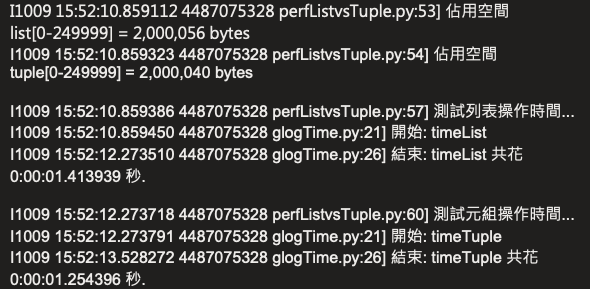

#### --debug 模式檢視檔案 'sample/perfListvsTuple.log' 如下：

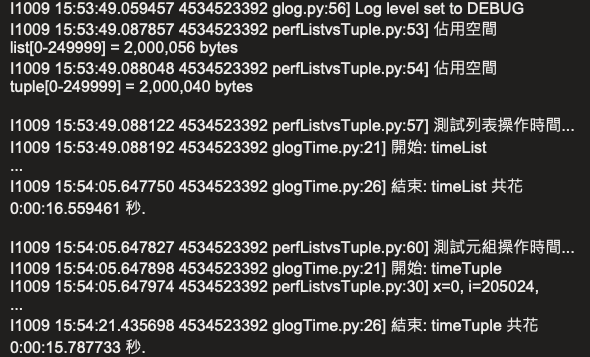

#### 結論是：使用元組的確比列表讀取速度比串列快，而且佔用記憶體空間比較少。
